# Bitcoin Price Analysis

#### Import required libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the data

In [18]:
df = pd.read_csv(r'D:\Data Analysis\5 Project\3. Python\Project_5_Bitcoin\Bitcoin_Data.csv')

#### Explore the data

In [27]:
# Check how many row and columns in dataframe
df.shape

(1556, 7)

In [33]:
# Display name of the columns
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [21]:
df.head(4)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"86,05,75,000","45,53,58,00,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"


In [34]:
# Check for Null Values
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [37]:
# Check for Duplicate Values
df.duplicated().sum()

0

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [24]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

##### The dataset is free of null values and duplicates; however, there are inconsistencies in the data types that require transformation.

#### Transform the data

In [41]:
# Date is in object/string datatype lets convert it to datetime datatype. We will use astype method to do conversion
df['Date'] = df['Date'].astype('datetime64[ns]')

# We can also use pd.to_datetime function to convert to datetime datatype

In [42]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [43]:
df['Date'][0]

Timestamp('2017-07-31 00:00:00')

In [45]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [46]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [62]:
# Will sort the data in descending order.
df.sort_index(ascending = False)

# In the sort_index method, the default setting is to sort in ascending order. By setting the parameter to False, the order is changed to descending.

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,50,05,20,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,49,11,60,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,59,77,80,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,54,28,20,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,29,21,90,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"


## Problem Statements :

#### 1. What was the change in price of the stock overtime?

In [80]:
# First, we will reset the index of the sorted data.
data  = df.sort_index(ascending = False).reset_index()

In [127]:
# we will remove index column as it is not necessary
data.drop('index', axis = 1,inplace = True)

In [128]:
data.columns.to_list()

['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

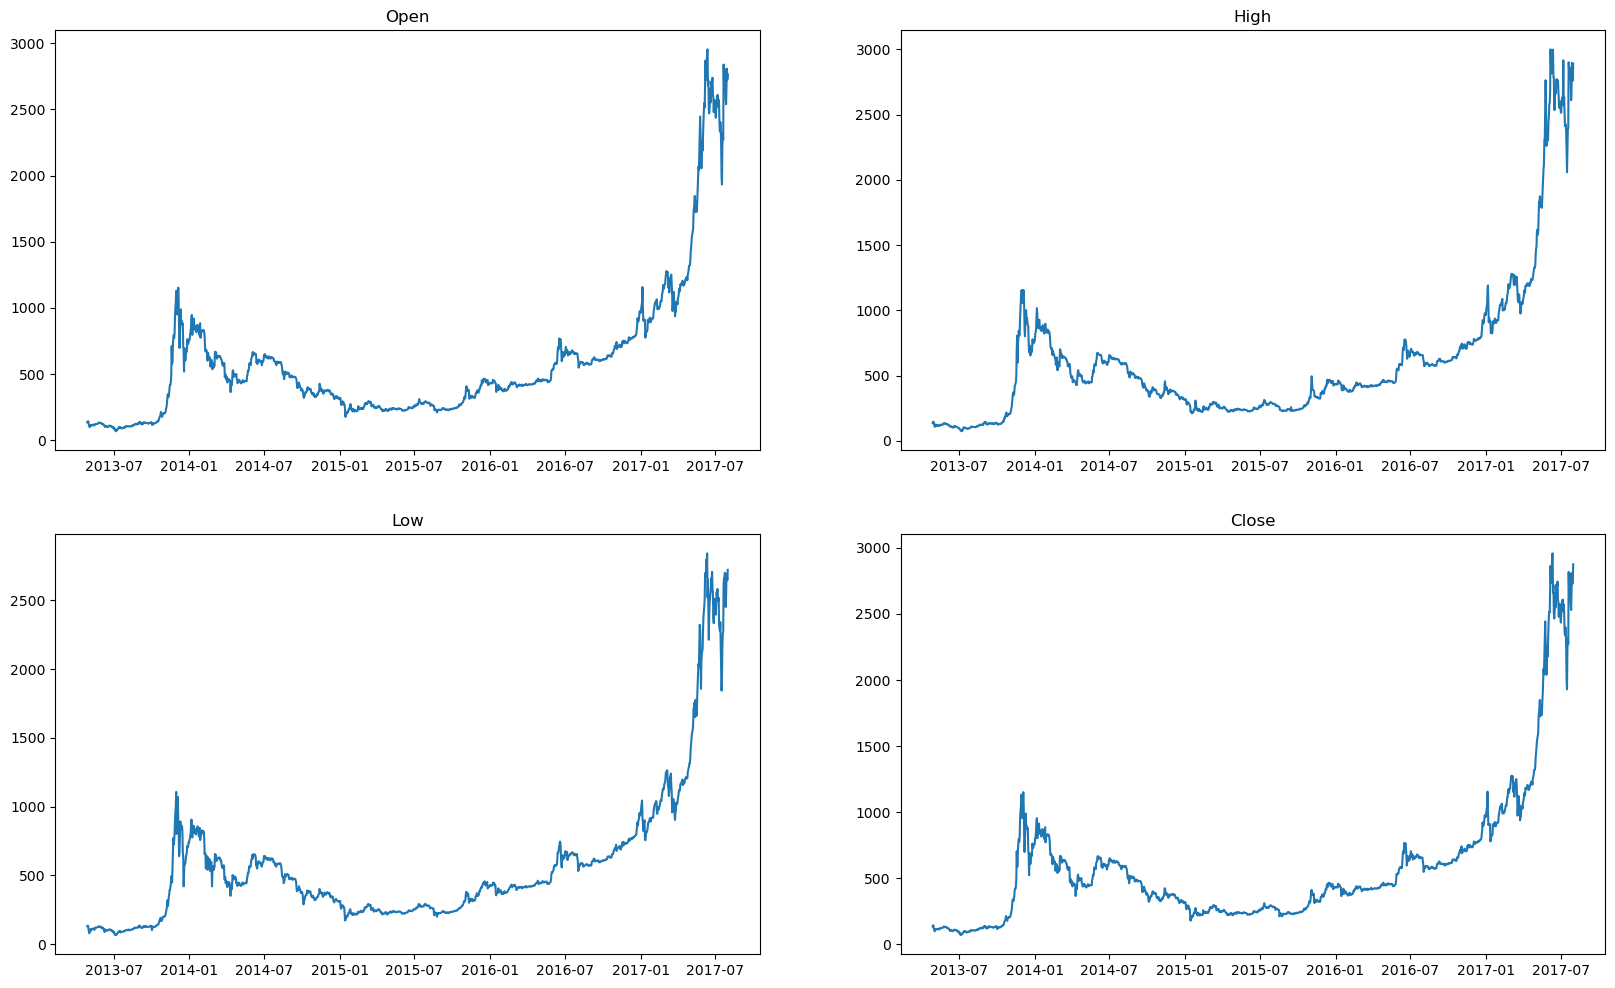

In [129]:
# We will utilize subplots to monitor the changes in stock prices over time.
plt.figure(figsize=(20,12))
for index, col in enumerate (['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'],df[col])
    plt.title(col)

#### Conclusion : There is a notable increase observed during the period from January to July 2017

#### 2. Analyse open, high, low, close value of bitcoinoin

##### We will make use of candlestick chart analyse the data

In [130]:
# We will make a sample data and use that for analysis

bs = data[0:50]

In [131]:
# Import required libraries

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [132]:
init_notebook_mode(connected= True)

In [133]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [ ]:
trace  = go.Candlestick(x = bs['Date'], 
               high = bs['High'],
               open = bs['Open'],
               close = bs['Close'],
               low = bs['Low'])

In [135]:
candle_data = [trace]

layout = {
    'title': 'Bitcoin Historical Price Trend',
          'xaxis':{'title':'Date'},
          'yaxis': {'title':'Price'}
    
}

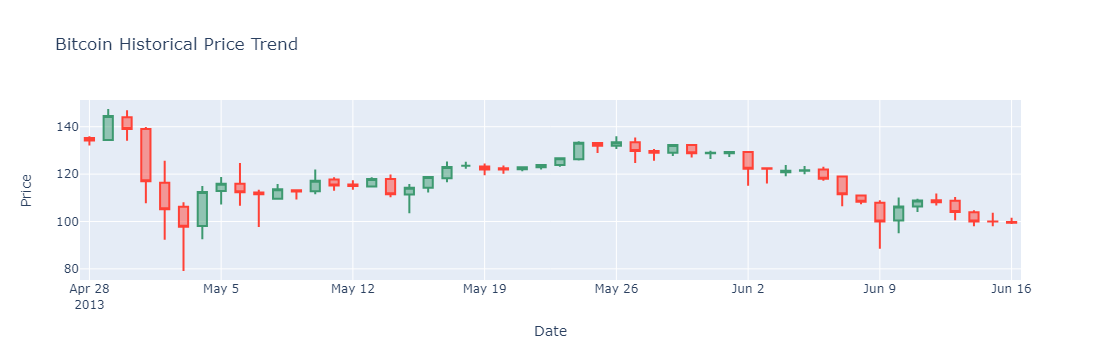

In [136]:
fig  = go.Figure(data  = candle_data, layout = layout)

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

#### 3. Analysing closing price.

##### We will conduct an in-depth analysis of the closing prices, utilizing logarithmic transformations for this analysis.



In [ ]:
# First, we will convert the Date column to the index to facilitate a more accurate analysis

data.set_index('Date',inplace = True)

In [138]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,50,05,20,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,49,11,60,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,59,77,80,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,54,28,20,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,29,21,90,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"


Text(0, 0.5, 'log')

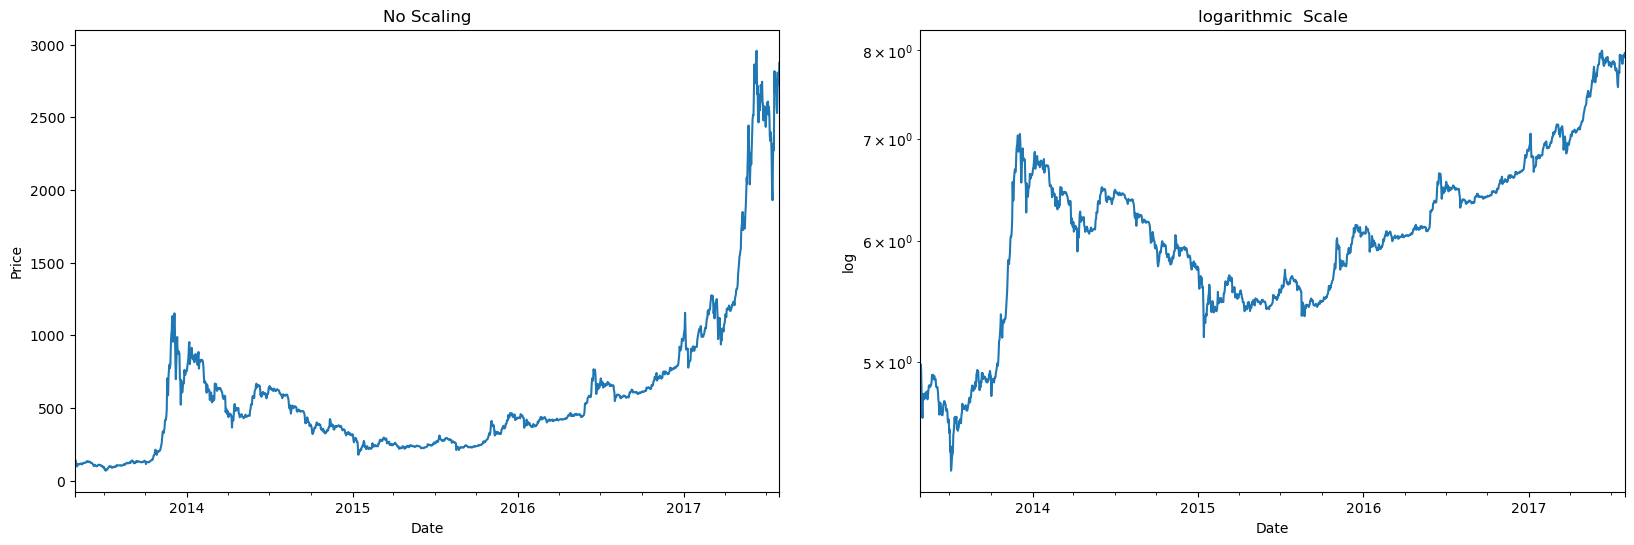

In [151]:
# now we will the data
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scaling')
plt.ylabel('Price')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('logarithmic  Scale')
plt.yscale('log')
plt.ylabel('log')


* Logarithmic price scales are better than linear price scales at showing less severe price increases or decreases.
* log scale is always better if u have outliers or some high values in datata

#### 4. Analyse closing price on Yearly, Quarterly, and monthly basis
* We will utilize resample() function to do the analysis

In [152]:
# First check data if Date column is index or not.
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,50,05,20,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,49,11,60,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,59,77,80,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,54,28,20,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,29,21,90,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"


In [153]:
# We will now utilize the resample() function on Closing Price to conduct an Yearly analysis.
data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

Text(0, 0.5, 'Price')

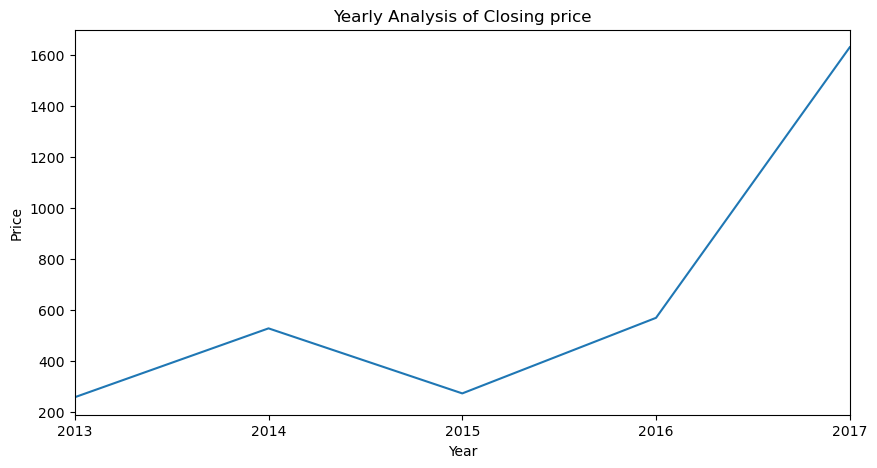

In [165]:
# Now we will show yearly analysis in chart
plt.figure(figsize=(10,5))
data['Close'].resample('Y').mean().plot()
plt.title('Yearly Analysis of Closing price')
plt.xlabel('Year')
plt.ylabel('Price')

In [166]:
# We will now utilize the resample() function on Closing Price to conduct an Quarterly analysis.
data['Close'].resample('Q').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: Q-DEC, Name: Close, dtype: float64

Text(0, 0.5, 'Price')

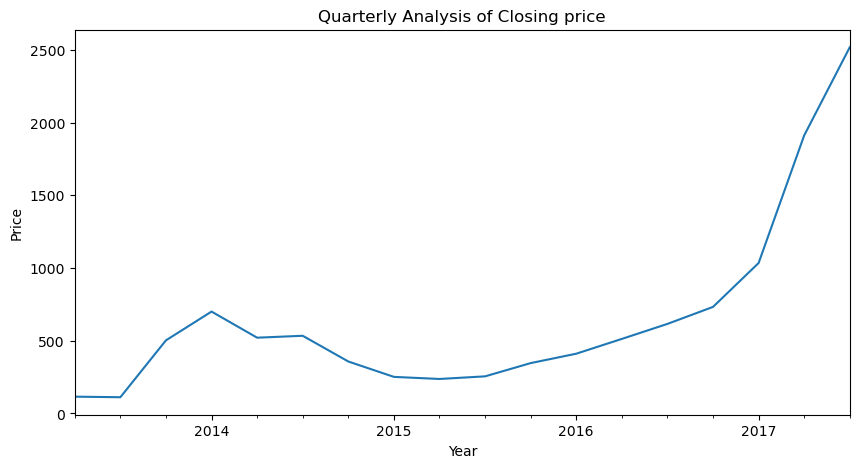

In [161]:
# Now we will show Quarterly analysis in chart
plt.figure(figsize=(10,5))
data['Close'].resample('Q').mean().plot()
plt.title('Quarterly Analysis of Closing price')
plt.xlabel('Year')
plt.ylabel('Price')

In [167]:
# We will now utilize the resample() function on Closing Price to conduct an Quarterly analysis.
data['Close'].resample('M').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

Text(0, 0.5, 'Price')

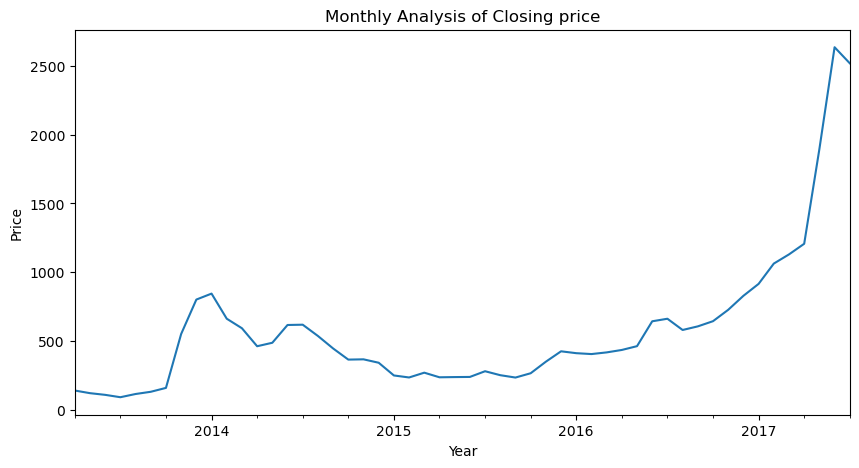

In [168]:
# Now we will show Monthly analysis in chart
plt.figure(figsize=(10,5))
data['Close'].resample('M').mean().plot()
plt.title('Monthly Analysis of Closing price')
plt.xlabel('Year')
plt.ylabel('Price')

#### 5. Analyse the daily change in closing price of stocks.

In [170]:
# We will utilize pct_change() function to observe percentage change in closing price.
data['%Change_in_closeing_price'] = data['Close'].pct_change()*100

Text(0, 0.5, '%')

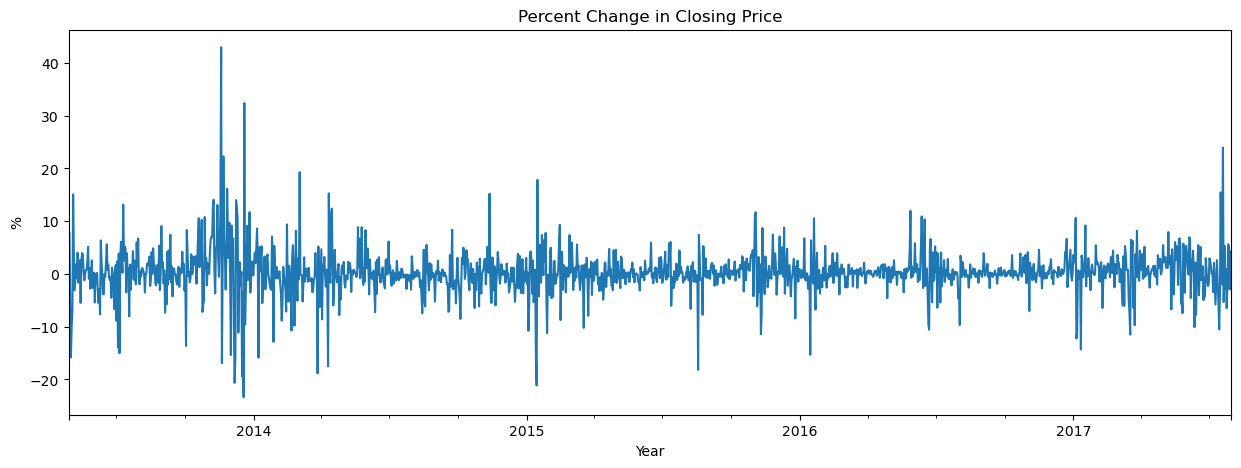

In [176]:
plt.figure(figsize=(15,5))

data['%Change_in_closeing_price'].plot()
plt.title('Percent Change in Closing Price')
plt.xlabel('Year')
plt.ylabel('%')


In [186]:
# We will plot another interactive chart using cufflinks library

import cufflinks as cf

In [187]:
cf.go_offline()

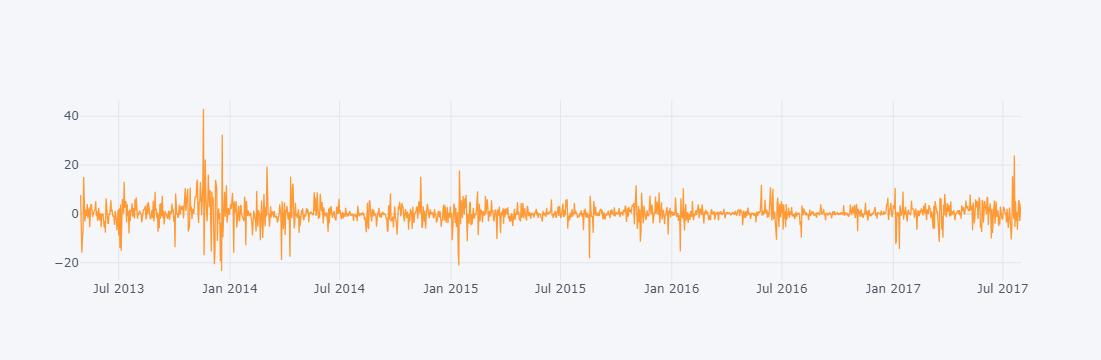

In [188]:
data['%Change_in_closeing_price'].iplot()